1. [활성함수] 다음 코드는 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (4점)

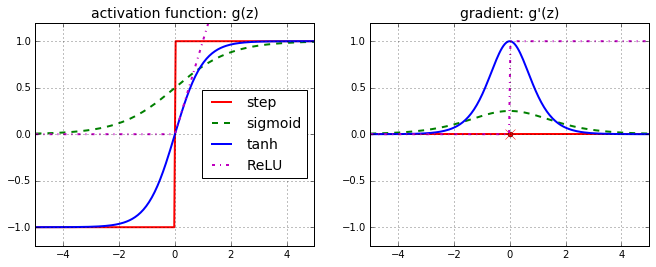

In [1]:
# Python 2, Python 3 지원
from __future__ import division, print_function, unicode_literals

# Library related
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


# sigmoid function 
def logit(z):
    return 1 /(1 + np.exp(-z))

# ReLU Function 
def relu(z):
    return np.maximum(0,z)

# deriavtive formula
# 미분 공식
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2*eps)

# sample data
# numpyt linspace's reference
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/-
# numpy.linspace.html
# this function return evenly spaced numbers over a specificed interval
z = np.linspace(-5, 5, 200)

# figure function's reference is 
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
# figsize width, height in inches
plt.figure(figsize=(11,4))

# The left figure is functions like sign, logit(sigmoid), tanh, relu
# activation function figure 
# the maplot's reference is 
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
# the matplot's subplot function 
# i.e. Either a 3-digit integer or three separate integers 
# describing the position of the subplot. 
# the three integers are nrow, ncol, and index in order.
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation function: g(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# The right figure is derivative function of each function above
# 각 activation function's 기울기 함수(미분함수)
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z),  "g--", linewidth=2,  label="sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("gradient: g'(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()
# (1) 화면 출력 확인 및 각 활성함수의 특징을 비교 서술
# step function: 계단 함수로 항상 기울기는 0, 단 원점에 미분 불가능하지만
#                여기서 원점의 미분값은 0으로 표시
# sigmoid : 0 ~ 1 사이 값을 출력을 하지만 미분 값은 원점에 최대
#           양쪽 끝(음수,양수)으로 갈수록 미분은 값은 0이다. 
# tanh : sigmoid function가 비슷하지만, 출력값이 -1 ~ 1 사이가 다르다.
#        하지만 양쪽 끝(음수, 양수)으로 갈수록 미분값은 0인것은 같다. 
# ReLu : 양수에서는 기울기가 1이고 음수에서는 출력값이외에 기울기도 0이다. 
# 각 activation function은 비선형적인 특징을 가지고 있다. 하지만 
# gradient가 다르고 포화되는 위치  gradient의 크기가 제 각각이다.

2. [오류 역전파] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (4점)
(코드의 해서과 결과의 의미를 작성하세요.)

In [2]:
import numpy as np
# numpy's random seed 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html
np.random.seed(0)

N, D = 3, 4

# numpy's random rand
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

# in numpy, the sign like * + is elementwise
a = x * y
b = a + z
c = np.sum(b)
# (1) 해당 연산망의 그래프 연산을 손으로 작성
# 아래의 그림처럼 단순 입력 값을 연산 순서에 맞게 위의 코드는 
# 계산을 한다.

![](figure/solution_figure/2_backpropagation_of_error_problem.PNG)

In [3]:
grad_c = 1.0
grad_b = grad_c * np.ones((N,D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a*y 
grad_y = grad_a*x
# (2) grad_c, grad_b, grad_a, grad_z, grad_x, grad_y 출력 확인
# 아래의 경우 error에 대한 backpropagation을 위한  gradient를 계산한 결과이다. 
print("grad_c:\n{}".format(grad_c))
print("grad_b:\n{}".format(grad_b))
print("grad_a:\n{}".format(grad_a))
print("grad_z:\n{}".format(grad_z))
print("grad_x:\n{}".format(grad_x))
print("grad_y:\n{}".format(grad_y))

grad_c:
1.0
grad_b:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_a:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_z:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_x:
[[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
grad_y:
[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


In [4]:
import torch 

# The Reference of torch.randn(N, D) is normal distribution
# about mean equal to 0, variance 1.
# https://pytorch.org/docs/stable/torch.html#torch.randn
x = torch.randn(N, D, requires_grad = True)
y = torch.randn(N, D, requires_grad = True)
z = torch.randn(N, D)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
# (3) grad_x, grad_y 출력확인
print("grad_x:\n{}".format(x.grad))
print("grad_y:\n{}".format(y.grad))

# 아래의 출력결과는 torch를 활용한 gradient 결과이다.

grad_x:
tensor([[-0.0335, -1.8936, -1.7183,  0.1238],
        [ 0.5946, -1.1660, -0.2718, -0.8095],
        [-1.2283,  0.1158,  0.7362,  0.4993]])
grad_y:
tensor([[ 1.4967,  0.7689, -1.1489,  0.8157],
        [ 1.1528, -1.5572, -0.1792,  1.3224],
        [-0.9345,  0.0363,  0.8121,  0.5222]])


3. [오류 역전파] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (4점)
(코드의 해석과 결과의 의미를 작성하세요.)

In [5]:
import torch

x = torch.randn(1, 10)
prev_h = torch.randn(1, 20)
w_h = torch.randn(20, 20,requires_grad = True)
w_x = torch.randn(20, 10, requires_grad = True)

# for debugging
#print("x:\n{}".format(x))
#print("prev_h:\n{}".format(prev_h))
#print("w_h:\n{}".format(w_h))
#print("w_x:\n{}".format(w_x))

# The Reference of torch.mm is 
# https://pytorch.org/docs/stable/torch.html?highlight=torch%20mm#torch.mm
# it means performing a matrix multiiplication of the matrixes, torch.mm(mat1, mat2)
i2h = torch.mm(w_x, x.t())
h2h = torch.mm(w_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()
# (1) 해당 신경망의 그래프를 연산을 손으로 작성 

# 아래의 그림을 벡터화 연산을 단순한 연산 그래프로 표현을 한 것이다. 

![](figure/solution_figure/3_backpropagation_of_error.PNG)

In [6]:
loss = next_h.sum()

# This backpropagation.
loss.backward()
# (2) loss 출력확인
print("loss:\n{}".format(loss))

# 위의 연산 그래프를 기반으로 첫번째 연산 결과의 값을 출력을 하고 있다.

loss:
7.345312118530273


4. [신경망 학습] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.(4점)
(코드의 해석화 결과의 의미를 작성하세요.)

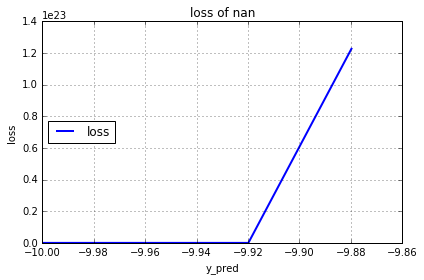

[2.6705592e+07 2.4481879e+09 3.8163021e+12 1.2271521e+23           inf
           nan           nan           nan           nan           nan]


In [7]:
import torch
# (1)의 그래프를 위한 library
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
# In the case below, I fixed it from D to N, wrong letter D in original assignment.
y = torch.randn(N, D_out)
w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

learning_rate = 10e-6

loss1 = []
for t in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    loss = (y_pred - y).pow(2).sum()
    # (1)의 출력을 위해
    loss1.append(loss)
    
    grad_y_pred = 2.0*(y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h <0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
# If you want to know how to use matplot
# reference is 
# https://matplotlib.org/tutorials/introductory/usage.html-
# #sphx-glr-tutorials-introductory-usage-py
# (1) y_pred에 따른 loss(accuracy) 변화를 화면 출력확인 (plot)

# x_array is a range of y_pred
x_array = np.linspace(-10, 10, len(loss1))

loss_array = np.asarray(loss1)
plt.plot(x_array, loss_array, "b-", linewidth=2, label="loss")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss of nan")

plt.legend(loc="center left")
plt.tight_layout()

plt.show()
print(loss_array[:10])
# (2) 해당 학습이 적절히 진행되고 있는지 서술
# 그래프 아래의 loss일부분을 출력 결과들에서 볼 수 있듯이
# loss의 값은 inf에서 nan으로 되는 것을 확인할 수있다. 
# 즉, 제대로 학습이 진행이 되지 않고 loss가 NAN(not a number) 되고 있다. 

5. [신경망 학습] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.(4점)
(코드의 해서과 결과의 의미를 작성하세요.)

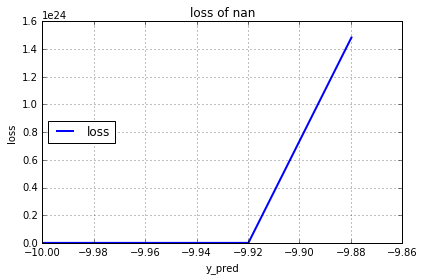

[tensor(29466088., grad_fn=<SumBackward0>)
 tensor(3200989696., grad_fn=<SumBackward0>)
 tensor(8593713659904., grad_fn=<SumBackward0>)
 tensor(1483960432685363251642368., grad_fn=<SumBackward0>)
 tensor(inf, grad_fn=<SumBackward0>) tensor(nan, grad_fn=<SumBackward0>)
 tensor(nan, grad_fn=<SumBackward0>) tensor(nan, grad_fn=<SumBackward0>)
 tensor(nan, grad_fn=<SumBackward0>) tensor(nan, grad_fn=<SumBackward0>)]


In [8]:
import torch
# (1)의 그래프를 위한 library
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
# In the case below, I fixed it from D to N, wrong letter D in original assignment.
y = torch.randn(N, D_out) 
w1 = torch.randn(D_in, H, requires_grad = True)
w2 = torch.randn(H, D_out, requires_grad = True)


loss2 = []
learning_rate = 10e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred-y).pow(2).sum()
    loss2.append(loss)
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()
        
        
# (1) 매 t마다 y_pred, loss 변화를 화면 출력확인(plot)
# x_array is a range of y_pred
x_array = np.linspace(-10, 10, len(loss2))

loss_array = np.asarray(loss2)
plt.plot(x_array, loss_array, "b-", linewidth=2, label="loss")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss of nan")

plt.legend(loc="center left")
plt.tight_layout()

plt.show()
print(loss_array[:10])
# (2) 앞 문제의 코드와 비교 
# 이경우에도 앞의 코드와 같은 INF(큰값)을 출력하고 
# 결국 하드웨어가 표현 할 수 있는 숫자의 범위를 넘어서고 있어서 
# NAN(not a nnumber)로 제대로 학습이 되지 않는다. 

6. [신경망 학습] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (4 점)
(코드의 해석과 결과의 의미를 작성하세요.)

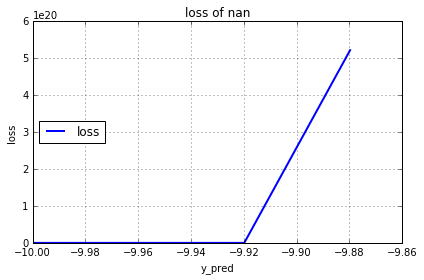

[tensor(25447612., grad_fn=<SumBackward0>)
 tensor(1472028032., grad_fn=<SumBackward0>)
 tensor(632687362048., grad_fn=<SumBackward0>)
 tensor(522104169572782309376., grad_fn=<SumBackward0>)
 tensor(inf, grad_fn=<SumBackward0>) tensor(inf, grad_fn=<SumBackward0>)
 tensor(nan, grad_fn=<SumBackward0>) tensor(nan, grad_fn=<SumBackward0>)
 tensor(nan, grad_fn=<SumBackward0>) tensor(nan, grad_fn=<SumBackward0>)]


In [9]:
# if you want to kwon processing below
# refer to https://pytorch.org/tutorials/beginner/-
# pytorch_with_examples.html#pytorch-tensors-and-autograd

import torch 
# (1)의 그래프를 위한 library
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt



class MyReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min=0)
    
    @staticmethod
    def backward(ctx, grad_y):
        x, = ctx.saved_tensors
        grad_input = grad_y.clone()
        grad_input[x<0] = 0
        return grad_input
    
def my_relu(x):
    return MyReLU.apply(x)

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
# In the case below, I fixed it from D to N, wrong letter D in original assignment.
y = torch.randn(N, D_out)
w1 = torch.randn(D_in, H, requires_grad = True)
w2 = torch.randn(H, D_out, requires_grad = True)

learning_rate = 10e-6


loss3 = []
for t in range(500):
    y_pred = my_relu(x.mm(w1)).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    loss3.append(loss)
    
    # Use autograd to compute the backward pass. This call will compute the
    # gragident of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w1 respectively.
    loss.backward()
    
    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights hvae requires_grad=True, but we don't need to track this 
    # in autograd
    # An alternaive way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with 
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        # Munually zero the gradient after updating weights.
        w1.grad.zero_()
        w2.grad.zero_()
        
# (1) 매 t마다 y_pred, loss 변화를 화면 출력 확인(Plot)
# x_array is a range of y_pred
x_array = np.linspace(-10, 10, len(loss3))

loss_array = np.asarray(loss3)
plt.plot(x_array, loss_array, "b-", linewidth=2, label="loss")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss of nan")

plt.legend(loc="center left")
plt.tight_layout()

plt.show()
print(loss_array[:10])
# (2) 앞 문제의 코드와 비교 
# 이 문제도 앞의 코드와 같이 
# NAN(not a number) 문제가 발생하여 
# 제대로 학습이 되지 않는다.

7. [신경망 학습] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.(4점)
(코드의 해석과 결과의 의미를 작성하세요.)

In [10]:
# -*- coding: utf-8 -*-
import torch


# (1)의 그래프를 위한 library
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

loss4 = []
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    loss4.append(loss)
    print(t, loss.item())

    # optimizer.zero_grad()
    
    
    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    # This is code error 
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

0 718.1978759765625
1 662.8934326171875
2 616.5111694335938
3 576.424560546875
4 541.5386352539062
5 510.836669921875
6 482.9616394042969
7 457.44415283203125
8 433.9782409667969
9 412.21710205078125
10 391.77203369140625
11 372.2953186035156
12 353.77642822265625
13 336.1709899902344
14 319.3929443359375
15 303.3969421386719
16 288.06109619140625
17 273.2137756347656
18 259.03326416015625
19 245.48629760742188
20 232.50196838378906
21 220.11004638671875
22 208.2649688720703
23 196.91213989257812
24 186.05368041992188
25 175.6905517578125
26 165.78414916992188
27 156.32968139648438
28 147.32948303222656
29 138.7594757080078
30 130.61029052734375
31 122.87881469726562
32 115.53153991699219
33 108.55865478515625
34 101.95967864990234
35 95.72602844238281
36 89.837890625
37 84.23637390136719
38 78.95781707763672
39 73.97859191894531
40 69.29460144042969
41 64.89137268066406
42 60.76799392700195
43 56.88897705078125
44 53.2520751953125
45 49.84382629394531
46 46.65242385864258
47 43.662780

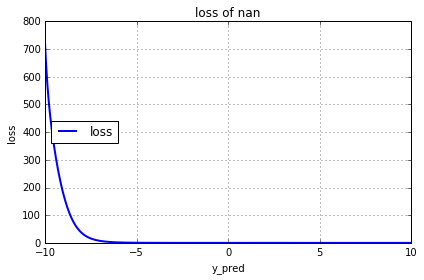

[tensor(718.1979, grad_fn=<MseLossBackward>)
 tensor(662.8934, grad_fn=<MseLossBackward>)
 tensor(616.5112, grad_fn=<MseLossBackward>)
 tensor(576.4246, grad_fn=<MseLossBackward>)
 tensor(541.5386, grad_fn=<MseLossBackward>)
 tensor(510.8367, grad_fn=<MseLossBackward>)
 tensor(482.9616, grad_fn=<MseLossBackward>)
 tensor(457.4442, grad_fn=<MseLossBackward>)
 tensor(433.9782, grad_fn=<MseLossBackward>)
 tensor(412.2171, grad_fn=<MseLossBackward>)]


In [11]:
# (1) 매 t마다 y_pred, loss  변화를 화면 출력확인(plot)
# x_array is a range of y_pred
x_array = np.linspace(-10, 10, len(loss4))

loss_array = np.asarray(loss4)
plt.plot(x_array, loss_array, "b-", linewidth=2, label="loss")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss of nan")

plt.legend(loc="center left")
plt.tight_layout()

plt.show()
print(loss_array[:10])

# (2) 앞 문제의 코드와 비교 
# 앞의 코드와 비교했을 때 loss는 계속 
# 감소하는 방향으로 제대로 학습이 되고 있다. 

8. [데이터 전처리] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.(4점)
(코드의 해석과 결과의 의미를 작성하세요.)

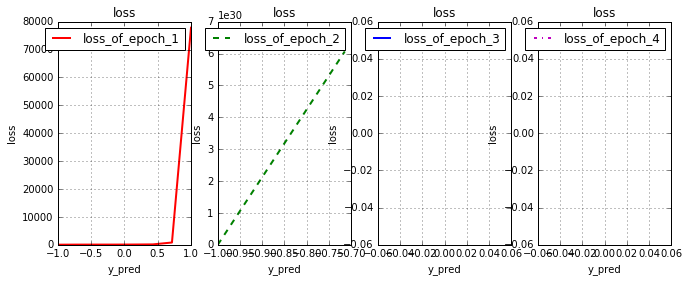

In [12]:
import torch 
from torch.utils.data import TensorDataset, DataLoader



# (1)의 그래프를 위한 library
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
# In the case below, I fixed it from D to N, wrong letter D in original assignment.
y = torch.randn(N, D_out)

loader = DataLoader(TensorDataset(x,y), batch_size=8)
model = TwoLayerNet(D_in, H, D_out)

# mean squared error of nn module
loss_fn = torch.nn.MSELoss(reduction='sum')

# Stochastic gradient descent of nn module
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)


loss5 = []
for epoch in range(20):
    loss5.append([])
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss5[epoch].append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        
# (1) 매 세대(epoch)마다 y_pred, loss 변화를 화면 출력 확인(plot)
# x_array is a range of y_pred
plt.figure(figsize=(11,4))

x_array = np.linspace(-1, 1, len(loss5[0]))

lines = ["r-", "g--", "b-", "m-."]

plt.subplot(141)
loss_array = np.asarray(loss5[0])
plt.plot(x_array, loss_array, lines[0], linewidth=2, label="loss_of_epoch_1")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")
plt.legend(loc="best")



plt.subplot(142)
loss_array = np.asarray(loss5[1])
plt.plot(x_array, loss_array, lines[1], linewidth=2, label="loss_of_epoch_2")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")



plt.subplot(143)
loss_array = np.asarray(loss5[2])
plt.plot(x_array, loss_array, lines[2], linewidth=2, label="loss_of_epoch_3")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")


plt.subplot(144)
loss_array = np.asarray(loss5[3])

plt.plot(x_array, loss_array, lines[3], linewidth=2, label="loss_of_epoch_4")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")

plt.show()
###### epoch 1 ~ 4 is done

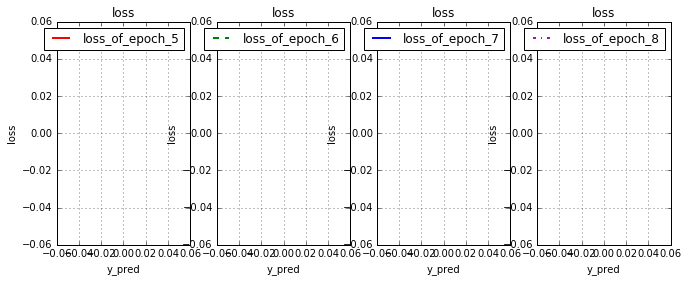

In [13]:
plt.figure(figsize=(11,4))

x_array = np.linspace(-1, 1, len(loss5[0]))

lines = ["r-", "g--", "b-", "m-."]

plt.subplot(141)
loss_array = np.asarray(loss5[4])
plt.plot(x_array, loss_array, lines[0], linewidth=2, label="loss_of_epoch_5")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")
plt.legend(loc="best")



plt.subplot(142)
loss_array = np.asarray(loss5[5])
plt.plot(x_array, loss_array, lines[1], linewidth=2, label="loss_of_epoch_6")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")



plt.subplot(143)
loss_array = np.asarray(loss5[6])
plt.plot(x_array, loss_array, lines[2], linewidth=2, label="loss_of_epoch_7")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")


plt.subplot(144)
loss_array = np.asarray(loss5[7])

plt.plot(x_array, loss_array, lines[3], linewidth=2, label="loss_of_epoch_8")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")

plt.show()
###### epoch 5 ~ 8 is done

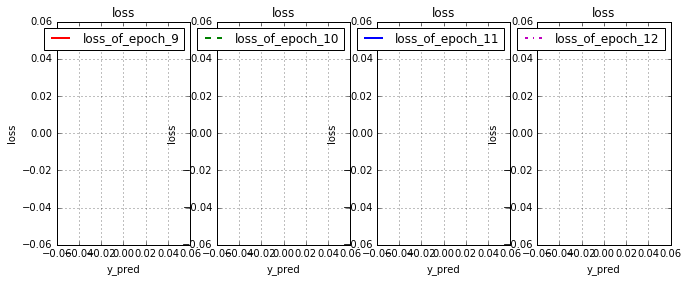

In [14]:
plt.figure(figsize=(11,4))

x_array = np.linspace(-1, 1, len(loss5[0]))

lines = ["r-", "g--", "b-", "m-."]

plt.subplot(141)
loss_array = np.asarray(loss5[8])
plt.plot(x_array, loss_array, lines[0], linewidth=2, label="loss_of_epoch_9")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")
plt.legend(loc="best")



plt.subplot(142)
loss_array = np.asarray(loss5[9])
plt.plot(x_array, loss_array, lines[1], linewidth=2, label="loss_of_epoch_10")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")



plt.subplot(143)
loss_array = np.asarray(loss5[10])
plt.plot(x_array, loss_array, lines[2], linewidth=2, label="loss_of_epoch_11")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")


plt.subplot(144)
loss_array = np.asarray(loss5[11])

plt.plot(x_array, loss_array, lines[3], linewidth=2, label="loss_of_epoch_12")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")

plt.show()
###### epoch 9 ~ 12 is done

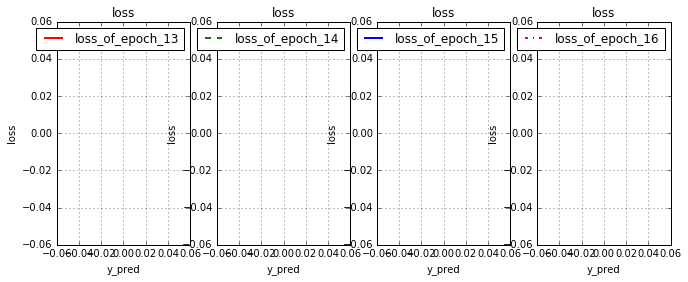

In [15]:
plt.figure(figsize=(11,4))

x_array = np.linspace(-1, 1, len(loss5[0]))

lines = ["r-", "g--", "b-", "m-."]

plt.subplot(141)
loss_array = np.asarray(loss5[12])
plt.plot(x_array, loss_array, lines[0], linewidth=2, label="loss_of_epoch_13")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")
plt.legend(loc="best")



plt.subplot(142)
loss_array = np.asarray(loss5[13])
plt.plot(x_array, loss_array, lines[1], linewidth=2, label="loss_of_epoch_14")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")



plt.subplot(143)
loss_array = np.asarray(loss5[14])
plt.plot(x_array, loss_array, lines[2], linewidth=2, label="loss_of_epoch_15")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")


plt.subplot(144)
loss_array = np.asarray(loss5[15])

plt.plot(x_array, loss_array, lines[3], linewidth=2, label="loss_of_epoch_16")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")

plt.show()
###### epoch 13 ~ 16 is done

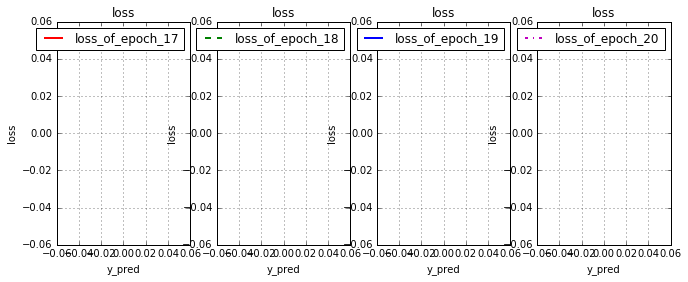

[tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)
 tensor(nan, grad_fn=<MseLossBackward>)]


In [16]:
plt.figure(figsize=(11,4))

x_array = np.linspace(-1, 1, len(loss5[0]))

lines = ["r-", "g--", "b-", "m-."]

plt.subplot(141)
loss_array = np.asarray(loss5[16])
plt.plot(x_array, loss_array, lines[0], linewidth=2, label="loss_of_epoch_17")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")
plt.legend(loc="best")



plt.subplot(142)
loss_array = np.asarray(loss5[17])
plt.plot(x_array, loss_array, lines[1], linewidth=2, label="loss_of_epoch_18")

plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")



plt.subplot(143)
loss_array = np.asarray(loss5[18])
plt.plot(x_array, loss_array, lines[2], linewidth=2, label="loss_of_epoch_19")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")


plt.subplot(144)
loss_array = np.asarray(loss5[19])

plt.plot(x_array, loss_array, lines[3], linewidth=2, label="loss_of_epoch_20")


plt.xlabel("y_pred")
plt.ylabel("loss")
plt.grid(True)

plt.title("loss")

plt.legend(loc="best")

plt.show()
###### epoch 17 ~ 20 is done
print(loss_array[:10])

# (2) 앞 문제의 코드와 비교
# 앞의 문제의 코드와 비교 했을때, 
# epoch이 증가 할때마다 loss가 증가하고 
# inf(무한대) 값을 거처 NAN 값으로 변하기 때문에 
# 학습이 제대로 이루어지지 않고 있다. 

9. [영상 인식] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.(12 점)
(코드의 해석과 결과의 의미를 작성하세요.)

Processing...
Done!


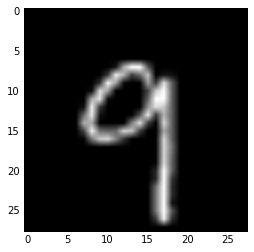

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

is_cuda = False

#if torch.cuda.is_available():
#    is_cuda = True
    
    
# Load data 
# reference is 
# https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
transformation = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,),(0.3081,))])

# MNIST data set 
train_dataset = datasets.MNIST('data/', train=True, 
                               transform=transformation, download=True)
test_dataset = datasets.MNIST('data/', train=False, 
                              transform=transformation, download=True)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


# first data for sample
sample_data = next(iter(train_loader))


def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image ) + std)
    plt.imshow(image, cmap='gray')
    

# first data set's image 
plot_img(sample_data[0][2])
# (1) 화면 출력 확인

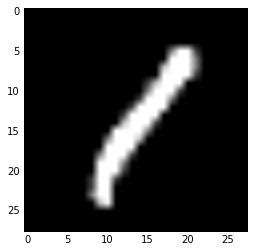

In [18]:
plot_img(sample_data[0][1])
# (2) 화면 출력 확인

In [19]:
# Convoluttion neural network

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # Dropout for optimization to regularize
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
             
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        #x = F.dropout(x, p=0.1, training = self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()

is_cuda = False

if is_cuda:
    model.cuda()
        
optimizer = optim.SGD(model.parameters(), lr=0.01)

data, target = next(iter(train_loader))

output = model(Variable(data))

# (3) output.size()  출력확인
# predicted output tensor of log_softmax
print("output.size():\n{}".format(output.size()))
# (4) target.size()  출력확인
# actual label 
print("\ntarget.size():\n{}".format(target.size()))

output.size():
torch.Size([32, 10])

target.size():
torch.Size([32])


In [ ]:
# For training of model of Net()

def fit(epoch, model, data_loader, phase="training", volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(data_loader):
        #if is_cuda:
        #    data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile), Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        
        running_loss += F.nll_loss(output, target, size_average=False).data[0]
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        
        if phase == 'training':
            loss.backward()
            optimizer.step()
            
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    
    print("{} loss is {} and {} accuracy is {}/{} -> {})".format(phase, loss, phase, 
                                                                 running_correct, 
                                                            len(data_loader.dataset), 
                                                                 accuracy))
    return loss, accuracy

train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []

for epoch in range(1, 20):
    epoch_loss, epoch_accuracy = fit(epoch, model, train_loader, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, 
                                             test_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    # (5) 화면 출력 확인
    # Cross validation 
    # comparing training set with validation set
    # I can early stop

/home/hyunyoung2/.local/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyunyoung2/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


training loss is 0.6113859415054321 and training accuracy is 48496/60000 -> 80)
validation loss is 0.1527758240699768 and validation accuracy is 9538/10000 -> 95)
training loss is 0.20129123330116272 and training accuracy is 56536/60000 -> 94)
validation loss is 0.09913709759712219 and validation accuracy is 9707/10000 -> 97)
training loss is 0.15464913845062256 and training accuracy is 57259/60000 -> 95)
validation loss is 0.07551019638776779 and validation accuracy is 9767/10000 -> 97)
training loss is 0.1335119605064392 and training accuracy is 57664/60000 -> 96)
validation loss is 0.06894422322511673 and validation accuracy is 9774/10000 -> 97)
training loss is 0.118095763027668 and training accuracy is 57954/60000 -> 96)
validation loss is 0.06384604424238205 and validation accuracy is 9800/10000 -> 98)
training loss is 0.10673841089010239 and training accuracy is 58116/60000 -> 96)
validation loss is 0.05334995687007904 and validation accuracy is 9830/10000 -> 98)


In [ ]:
plt.plot(range(1,len(train_losses)+1), train_losses, 'bo', label = 'trainig loss')
plt.plot(range(1, len(val_losses)+1), val_losses, 'r', label = 'validation loss')
plt.legend()
# (6) 화면 출력 확인
# comparing training loss and validation loss

In [ ]:
plt.plot(range(1, len(train_accuracy)+1), train_accuracy, 'bo', label = 'train accuracy')
plt.plot(range(1, len(val_accuracy)+1), val_accuracy, 'r', label = 'val accuracy')
plt.legend()
# (7) 화면 출력 확인
# comparing triang accuracy and validation loss 

10. NOR 게이트와 AND 게이트의 동작을 데이터로 간주하면 다음과 같다. 이들을 100% 옮게 분류하는 퍼셉트론을 각각 제시하시오.

![](figure/Assignment2_figure1.png)

figure1-1의 퍼셉트론은 NOR gate를 위한 것이다. NOR 게이트의 분류를 하는 것도 hpyer plane 하나로 가능하기 때문에 figure1의 그림처럼 hyper plane으로 영역을 두개로 구분하여 분류가 가능하다. 

![](figure/solution_figure/10_NOR_gate_perceptron.PNG)

figure2-1퍼셉트론은 AND gate를 위한 것이다. AND 게이트의 경우에는 하나의 hyper plane을 통해 output 결과들을 figure2와 같이 분류할 수 있다.그래서 충분히 하나의 perceptron으로 분류가 가능하다.

![](figure/solution_figure/10_AND_gate_preceptron.PNG)

11. 다음은 은닉층이 3개인 DMLP이다. 
Hint 계산은 Matlab 또는 Python을 사용하시오. 

![](figure/Assignment2_figure2.png)

(1) 가중치 행렬 U1, U2, U3, U4를 식(4.1)처럼 쓰시오.

In [ ]:
import numpy as np

U1 = np.array([[-0.3, 1.0, 1.2],
               [1.6, -1.0, -1.1]])

U2 = np.array([[1.0, 1.0, -1.0],
               [0.7, 0.5, 1.0]])

U3 = np.array([[0.5, -0.8, 1.0],
               [-0.1, 0.3, 0.4]])

U4 = np.array([[1.0, 0.1, -0.2],
               [-0.2, 1.3, -0.4]])

print("U1:\n{}".format(U1))
print("U2:\n{}".format(U2))
print("U3:\n{}".format(U3))
print("U4:\n{}".format(U4))

(2) x = (1,0)T 가 입력되었을 때 출력 O를 구하시오. 활성함수로 로지스틱 시그모이드를 사용하시오. 

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

x = np.array([1,1,0])
print("x:{}\n{}".format(x.shape, x))
x_t = x.T
print("x.T:{}\n{}".format(x_t.shape, x_t))
hidden_1 = sigmoid(U1.dot(x_t))
print("hidden_1:{}\n{}".format(hidden_1.shape, hidden_1))

# U1 is done

x_1 = np.append([1], hidden_1)
print("\nx_1:{}\n{}".format(x_1.shape, x_1))
x_1_t = x_1.T
print("x_1.T:{}\n{}".format(x_1_t.shape, x_1_t))
hidden_2 = sigmoid(U2.dot(x_1_t))
print("hidden_2:{}\n{}".format(hidden_2.shape, hidden_2))

# U2 is done

x_2 = np.append([1], hidden_2)
print("\nx_2:{}\n{}".format(x_2.shape, x_2))
x_2_t = x_2.T
print("x_2.T:{}\n{}".format(x_2_t.shape, x_2_t))
hidden_3 = sigmoid(U3.dot(x_2_t))
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U3 is done

x_3 = np.append([1], hidden_3)
print("\nx_3:{}\n{}".format(x_3.shape, x_3))
x_3_t = x_3.T
print("x_3.T:{}\n{}".format(x_3_t.shape, x_3_t))
hidden_3 = U4.dot(x_3_t)
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U4 is done


print("\ninput of sigmoid:\n{}".format(hidden_3))
print("final output with logisitic sigmoid funtion")
output_of_sigmoid = sigmoid(hidden_3)
print(output_of_sigmoid)

(3) x = (1,0)T 가 입력되었을 때 출력 O를 구하시오. 활성함수로 ReLU를 사용하시오.

sol> 위의 simoid function에서 활성함수를 ReLU로 바꾸면 바로 그 값이 되기때문에
     활성함수만 만들고 바로 hidden_3의 값에 활성함수 ReLU를 사용하였다.

In [ ]:
def ReLU(z):
    return np.maximum(0, z)

x = np.array([1,1,0])
print("x:{}\n{}".format(x.shape, x))
x_t = x.T
print("x.T:{}\n{}".format(x_t.shape, x_t))
hidden_1 = ReLU(U1.dot(x_t))
print("hidden_1:{}\n{}".format(hidden_1.shape, hidden_1))

# U1 is done

x_1 = np.append([1], hidden_1)
print("\nx_1:{}\n{}".format(x_1.shape, x_1))
x_1_t = x_1.T
print("x_1.T:{}\n{}".format(x_1_t.shape, x_1_t))
hidden_2 = ReLU(U2.dot(x_1_t))
print("hidden_2:{}\n{}".format(hidden_2.shape, hidden_2))

# U2 is done

x_2 = np.append([1], hidden_2)
print("\nx_2:{}\n{}".format(x_2.shape, x_2))
x_2_t = x_2.T
print("x_2.T:{}\n{}".format(x_2_t.shape, x_2_t))
hidden_3 = ReLU(U3.dot(x_2_t))
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U3 is done

x_3 = np.append([1], hidden_3)
print("\nx_3:{}\n{}".format(x_3.shape, x_3))
x_3_t = x_3.T
print("x_3.T:{}\n{}".format(x_3_t.shape, x_3_t))
hidden_3 = U4.dot(x_3_t)
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U4 is done

print("input of ReLU:\n{}".format(hidden_3))
print("final output with ReLU on hidden_3")
output_of_ReLU = ReLU(hidden_3)
print(output_of_ReLU)

(4) x = (1,0)T 의 기대출력 O = (0,1)T일 때, 현재 1.0인 u312 가중치를 0.9로 줄이면 오류에 어떤 영향을 미치는지 설명하시오.

sol> 오류 함수를 Mean Squared Error 함수로 설정하고, 활성함수는 logistic sigmoid 와 ReLU 두개로 하여 결과를 아래와 같이 
    뽑아 냈다. 
    그 결과 활성함수 logisitic sigmoid function과 함께 한 경우, Mean Squared Error는 증가하고, 
    반대로 활성함수 ReLU와 함께 한 경우는 Mean Sqared Error가 감소하였다.

In [ ]:
expected = np.array([0,1], dtype=float)

print("expected:\n{}".format(expected))

def loss_function(output, expectation):
    return ((output-expectation)**2).mean()

print("\nU321 0.9로 바꾸기 전 with logisitic sigmoid")
prior_sigmoid = loss_function(output_of_sigmoid, expected)
print(prior_sigmoid)

U_3 = np.array([[0.5, -0.8, 0.9],
               [-0.1, 0.3, 0.4]])

print("\n U321 1.0 -> 0.9 바꾼후 다시 계산")
x = np.array([1,1,0])
print("x:{}\n{}".format(x.shape, x))
x_t = x.T
print("x.T:{}\n{}".format(x_t.shape, x_t))
hidden_1 = sigmoid(U1.dot(x_t))
print("hidden_1:{}\n{}".format(hidden_1.shape, hidden_1))

# U1 is done

x_1 = np.append([1], hidden_1)
print("\nx_1:{}\n{}".format(x_1.shape, x_1))
x_1_t = x_1.T
print("x_1.T:{}\n{}".format(x_1_t.shape, x_1_t))
hidden_2 = sigmoid(U2.dot(x_1_t))
print("hidden_2:{}\n{}".format(hidden_2.shape, hidden_2))

# U2 is done

x_2 = np.append([1], hidden_2)
print("\nx_2:{}\n{}".format(x_2.shape, x_2))
x_2_t = x_2.T
print("x_2.T:{}\n{}".format(x_2_t.shape, x_2_t))
hidden_3 = sigmoid(U_3.dot(x_2_t))
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U3 is done

x_3 = np.append([1], hidden_3)
print("\nx_3:{}\n{}".format(x_3.shape, x_3))
x_3_t = x_3.T
print("x_3.T:{}\n{}".format(x_3_t.shape, x_3_t))
hidden_3 = U4.dot(x_3_t)
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U4 is done

print("\ninput of sigmoid:\n{}".format(hidden_3))
print("final output with logisitic sigmoid funtion")
output_of_sigmoid_after = sigmoid(hidden_3)
print(output_of_sigmoid_after)

print("\nU321 0.9로 바꾸기 후 with logisitic sigmoid funtion")
post_sigmoid = loss_function(output_of_sigmoid_after, expected) 
print("Befor: {}".format(prior_sigmoid))
print("After: {}".format(post_sigmoid))

In [ ]:
expected = np.array([0,1], dtype=float)

print("expected:\n{}".format(expected))

def loss_function(output, expectation):
    return ((output-expectation)**2).mean()

print("\nU321 0.9로 바꾸기 전 with ReLU")
prior_ReLU = loss_function(output_of_ReLU, expected)
print(prior_ReLU)

U_3 = np.array([[0.5, -0.8, 0.9],
               [-0.1, 0.3, 0.4]])

print("\n U321 1.0 -> 0.9 바꾼후 다시 계산")
x = np.array([1,1,0])
print("x:{}\n{}".format(x.shape, x))
x_t = x.T
print("x.T:{}\n{}".format(x_t.shape, x_t))
hidden_1 = ReLU(U1.dot(x_t))
print("hidden_1:{}\n{}".format(hidden_1.shape, hidden_1))

# U1 is done

x_1 = np.append([1], hidden_1)
print("\nx_1:{}\n{}".format(x_1.shape, x_1))
x_1_t = x_1.T
print("x_1.T:{}\n{}".format(x_1_t.shape, x_1_t))
hidden_2 = ReLU(U2.dot(x_1_t))
print("hidden_2:{}\n{}".format(hidden_2.shape, hidden_2))

# U2 is done

x_2 = np.append([1], hidden_2)
print("\nx_2:{}\n{}".format(x_2.shape, x_2))
x_2_t = x_2.T
print("x_2.T:{}\n{}".format(x_2_t.shape, x_2_t))
hidden_3 = ReLU(U_3.dot(x_2_t))
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U3 is done

x_3 = np.append([1], hidden_3)
print("\nx_3:{}\n{}".format(x_3.shape, x_3))
x_3_t = x_3.T
print("x_3.T:{}\n{}".format(x_3_t.shape, x_3_t))
hidden_3 = U4.dot(x_3_t)
print("hidden_3:{}\n{}".format(hidden_3.shape, hidden_3))

# U4 is done

print("\ninput of ReLU:\n{}".format(hidden_3))
print("final output with ReLU")
output_of_ReLU_after = ReLU(hidden_3)
print(output_of_ReLU_after)

print("\nU321 0.9로 바꾸기 후 with ReLU")
post_ReLU = loss_function(output_of_ReLU_after, expected) 
print("Befor: {}".format(prior_ReLU))
print("After: {}".format(post_ReLU))

12. [그림 4-14]에서 특징 맵의 나머지 8개 값을 계산하시오.

![](figure/Assignment2_figure3.png)


In [ ]:
import numpy as np

R = np.array([[0,0,0,0,0],
              [0,1,1,1,0],
              [0,2,1,3,0],
              [0,0,1,0,0],
              [0,0,0,0,0]])

G = np.array([[0,0,0,0,0],
              [0,2,2,2,0],
              [0,1,0,1,0],
              [0,0,0,1,0],
              [0,0,0,0,0]])

B = np.array([[0,0,0,0,0],
              [0,0,3,0,0],
              [0,1,0,1,0],
              [0,1,0,0,0],
              [0,0,0,0,0]])

R_kernel =  np.array([[0,0,0],
                      [0,0,1],
                      [0,1,0]])

G_kernel =  np.array([[0,2,0],
                      [0,2,0],
                      [0,2,0]])

B_kernel =  np.array([[1,0,0],
                      [0,2,0],
                      [0,0,1]])


a11 = ((R[0:3, 0:3] * R_kernel) + 
       (G[0:3, 0:3] * G_kernel) + 
       (B[0:3, 0:3] * B_kernel))

a12 = ((R[0:3, 0+1:3+1]* R_kernel) +
       (G[0:3, 0+1:3+1] * G_kernel) + 
       (B[0:3, 0+1:3+1] * B_kernel))

a13 = ((R[0:3, 0+2:3+2] * R_kernel) + 
       (G[0:3, 0+2:3+2] * G_kernel) + 
       (B[0:3, 0+2:3+2] * B_kernel))

a21 = ((R[0+1:3+1, 0:3] * R_kernel) + 
       (G[0+1:3+1, 0:3] * G_kernel) + 
       (B[0+1:3+1, 0:3] * B_kernel))

a22 = ((R[0+1:3+1, 0+1:3+1]* R_kernel) + 
       (G[0+1:3+1, 0+1:3+1] * G_kernel) + 
       (B[0+1:3+1, 0+1:3+1] * B_kernel))

a23 = ((R[0+1:3+1, 0+2:3+2] * R_kernel) + 
       (G[0+1:3+1, 0+2:3+2] * G_kernel) + 
       (B[0+1:3+1, 0+2:3+2] * B_kernel))

a31 = ((R[0+2:3+2, 0:3] * R_kernel) + 
       (G[0+2:3+2, 0:3] * G_kernel) + 
       (B[0+2:3+2, 0:3] * B_kernel))

a32 = ((R[0+2:3+2, 0+1:3+1]* R_kernel) + 
       (G[0+2:3+2, 0+1:3+1] * G_kernel) + 
       (B[0+2:3+2, 0+1:3+1] * B_kernel))

a33 = ((R[0+2:3+2, 0+2:3+2] * R_kernel) + 
       (G[0+2:3+2, 0+2:3+2] * G_kernel) + 
       (B[0+2:3+2, 0+2:3+2] * B_kernel))
        
feature_map =np.array([[a11.sum(), a12.sum(), a13.sum()],
                       [a21.sum(), a22.sum(), a23.sum()],
                       [a31.sum(), a32.sum(), a33.sum()]])

print("Feature map:\n{}".format(feature_map))

13. 컨볼루션 층의 입력 크기가 32\*32\*3이고, (a) 10개 5\*5 필터들을 보폭 1과 덧대기 2로 적용하였을 때 출력의 크기와 매개변수의 수를 구하세요. (b) 동일한 입력에 64개 3\*3필터들을 보폭 1과 덧대기 1로 적용하였을 때 출력의 크기와 매개변수의 수도 구하세요. (6점)

(a) 10개 5\*5 필터들을 보폭 1과 덧대기 2로 적용하였을 때 출력의 크기와 매개변수의 수를 구하세요.

매개변수의 수는 필터 5 by 5 이고, 이러한 필터가 10개 이므로, 입력 층의 depth 3 이므로

필터마다 1 개의 bias를 가진다면 

총 매개변수는 5 \* 5 \* 3 \* 10 + 10 = 760개

출력의 크기는 W2 \* H2 \* D2 

- W2 = (32-5+2\*2)/1+1 = 32 

- H2 = (32-5+2\*2)/1+1 = 32

- D2 = k = 10

(b) 동일한 입력에 64개 3\*3필터들을 보폭 1과 덧대기 1로 적용하였을 때 출력의 크기와 매개변수의 수도 구하세요.

매개변수의 수는 필터 3 by 3 이고, 이러한 필터가 64개 이므로, 입력 층의 depth 3 이므로

필터마다 1 개의 bias를 가진다면 

총 매개변수는 3 \* 3 \* 3 \* 64 + 64 = 1792


출력의 크기는 W2 \* H2 \* D2 

- W2 = (32-3+2\*1)/1+1 = 32

- H2 = (32-3+2\*1)/1+1 = 32

- D2 = k = 64

14. 아래 그림의 연산 그래프 예처럼 f(x,y,z) = (x+y)z 연산에 대한 연산 그래프를 새롭게 생성하고, x=-2, y=5, z=-4인 경우에 전방 전파와 이에 대응되는 오류 역전파를 각 가중치마다 계산하세요.

[예에 표시된 것처럼 전방 전파 연산 결과는 검은색 빈칸, 오류 역전파 연산 결과는 빨간색 빈칸으로 표시하여 구분하세요.]

![](figure/Assignment2_figure4.png)

sol>

![](figure/solution_figure/14_computational_graph.PNG)

# Reference


- [pytorch docs](https://pytorch.org/docs/)

- [Fequently Asked Quest on pytorch docs](https://pytorch.org/docs/stable/notes/faq.html?highlight=loss%20backward)

- [Automatic differentiation](https://pytorch.org/docs/stable/autograd.html?highlight=autograd%20variable)

- [pytorch tutorial](https://pytorch.org/tutorials/intermediate/spatial_transformer_tutorial.html)

- [How to load data on pytorch](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html) 